# Time Series EDA (Practice)
Let's examine a real-world example of a random walk. Daily stock prices are a great example. This is the [daily stock closing price for Microsoft](https://drive.google.com/file/d/11OIv7OHo3zbRBFNSf4N--r7WIsjrG3SC/view?usp=sharing).

After loading in the data,

0) Convert the Date column to datetime dtype and make the index.

1) Resample the data as business days "B".

2) Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

3) Visualize the time series.

5) Check for stationarity with the Ad Fuller Test.

6) Check for autocorrelation with an ACF plot.

7) Difference the data once.

8) Visualize the differenced data.

9) Check the differenced data for stationarity with the Ad Fuller Test.

10) Check the differenced data for autocorrelation with an ACF Plot.

**Imports**

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import  statsmodels.tsa.api as tsa
from sklearn import set_config
set_config(transform_output="pandas")
plt.rcParams["figure.figsize"] = (12, 4)
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)

**Load Data**

In [2]:
df = pd.read_csv('Data/stock_prices.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1258 non-null   object 
 1   Closing Price  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000


## Convert the Date column to datetime dtype and make the index.

In [3]:
# convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], format=('%Y-%m-%d'))

#set date as index
df = df.set_index('Date')

#display index
df.head()

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000


## Resample the data as business days "B".

In [4]:
ts = df.resample('B').asfreq()
ts

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000
...,...
2014-12-25,NaN
2014-12-26,47.880001
2014-12-29,47.450001


## Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

In [5]:
# check for null values
ts.isna().sum()

Closing Price    45
dtype: int64

In [6]:
# Forward fill the stock data
ts = ts.fillna(method='ffill')
ts.isna().sum()

Closing Price    0
dtype: int64

## Visualize the time series.

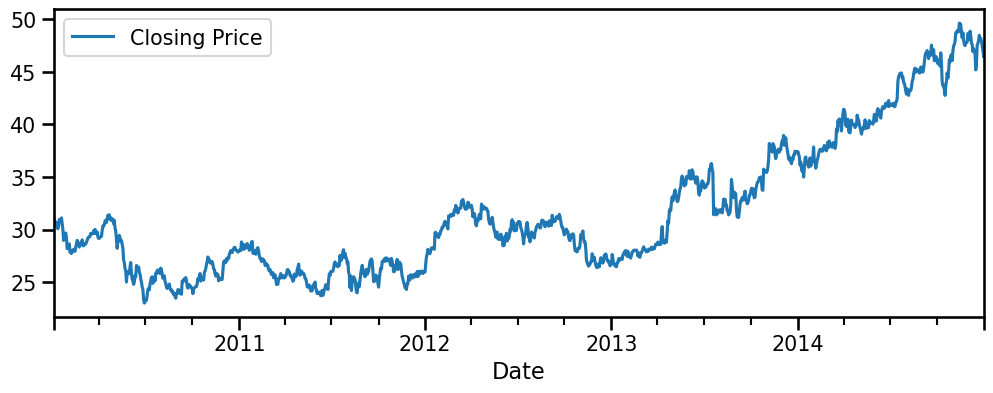

In [7]:
ts.plot();

## Check for stationarity with the Ad Fuller Test

In [12]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [15]:
# Check for stationarity with adfuller
adfuller_results = get_adfuller_results(ts, label='Closing Price')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Closing Price,-0.10329,0,1302,0.94911,0.05,False


- The raw data is ***not*** stationary.

## Check for autocorrelation with an ACF plot

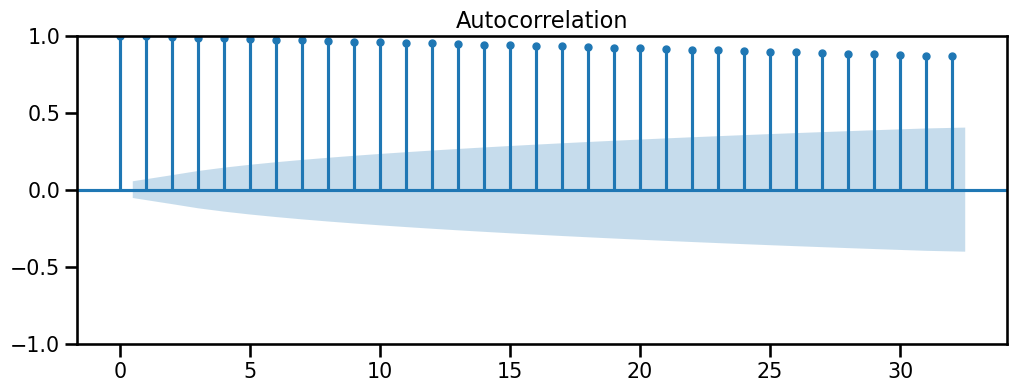

In [16]:
# Check for autocorrelation
fig = tsa.graphics.plot_acf(ts);

- There ***is*** significant autocorrelation.

## Difference the data once

In [17]:
# Apply 1 differencing and drop the nulls
ts_diff = ts.diff().dropna()
ts_diff.head()

,Closing Price
Date,
2010-01-05,0.009998
2010-01-06,-0.189999
2010-01-07,-0.320000
2010-01-08,0.209999
2010-01-11,-0.389999


## Visualize the differenced data

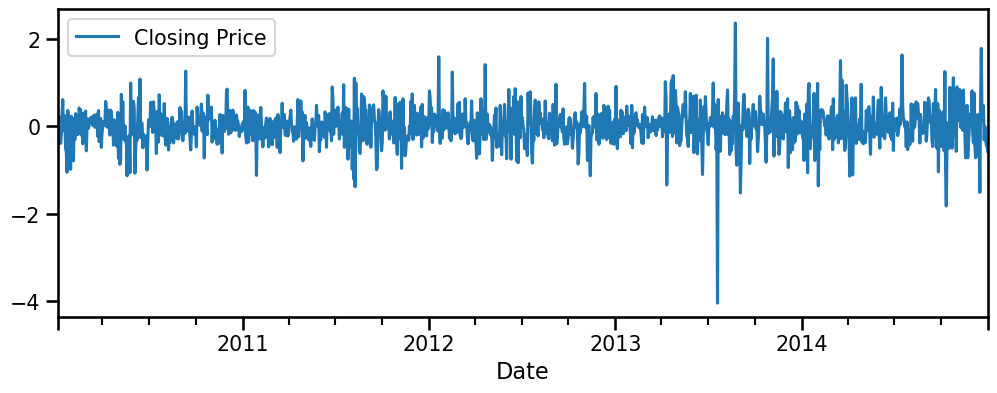

In [18]:
ts_diff.plot();

## Check the differenced data for stationarity with the Ad Fuller Test

In [19]:
# Check differenced data for stationarity
# Check for stationarity with adfuller
adfuller_results = get_adfuller_results(ts_diff, label='differenced')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
differenced,-35.778578,0,1301,0.0,0.05,True


- The differenced data ***is*** stationary.

## Check the differenced data for autocorrelation with an ACF Plot

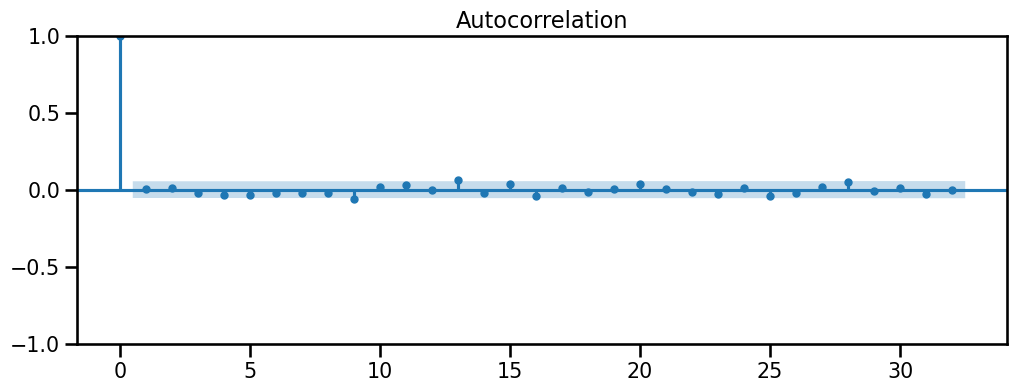

In [20]:
# Check differenced data for autocorrelation
fig = tsa.graphics.plot_acf(ts_diff);

- There is ***no*** significant autocorrelation in the differenced data.